# Importing Data

In [1]:
# Imports and basic config
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Projects\ Tata Steel Machine Failure Prediction\test.csv")
train = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Projects\ Tata Steel Machine Failure Prediction\train.csv")

In [3]:
test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [4]:
train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [5]:
print(train.shape)
print(test.shape)
print(list(train.columns))

(136429, 14)
(90954, 13)
['id', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


# Cleaning Data

In [6]:
# Fix the target column name
target_col = "Machine failure"   # <-- use exact name from your dataset

# Re-run imputation
for col in train.columns:
    if train[col].dtype == "object":
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)
        if col in test.columns:
            test[col]  = test[col].fillna(mode_val)
    else:
        median_val = train[col].median()
        train[col] = train[col].fillna(median_val)
        if col in test.columns:
            test[col]  = test[col].fillna(median_val)

print("Missing values after imputation:")
print(train.isna().sum().sum(), "in train")
print(test.isna().sum().sum(), "in test")

Missing values after imputation:
0 in train
0 in test


In [7]:
train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


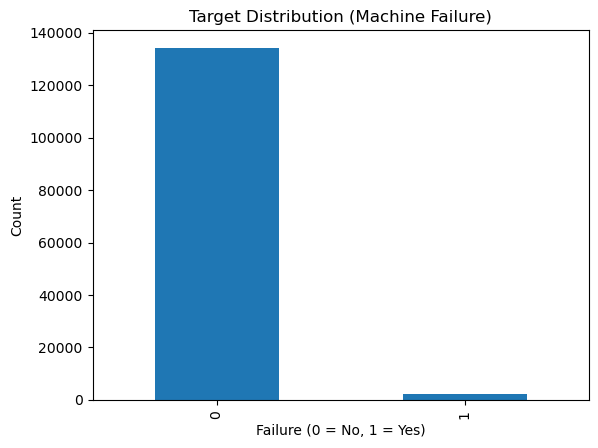

In [9]:
import matplotlib.pyplot as plt

# Plot target distribution
train["Machine failure"].value_counts().plot(kind="bar")
plt.title("Target Distribution (Machine Failure)")
plt.xlabel("Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

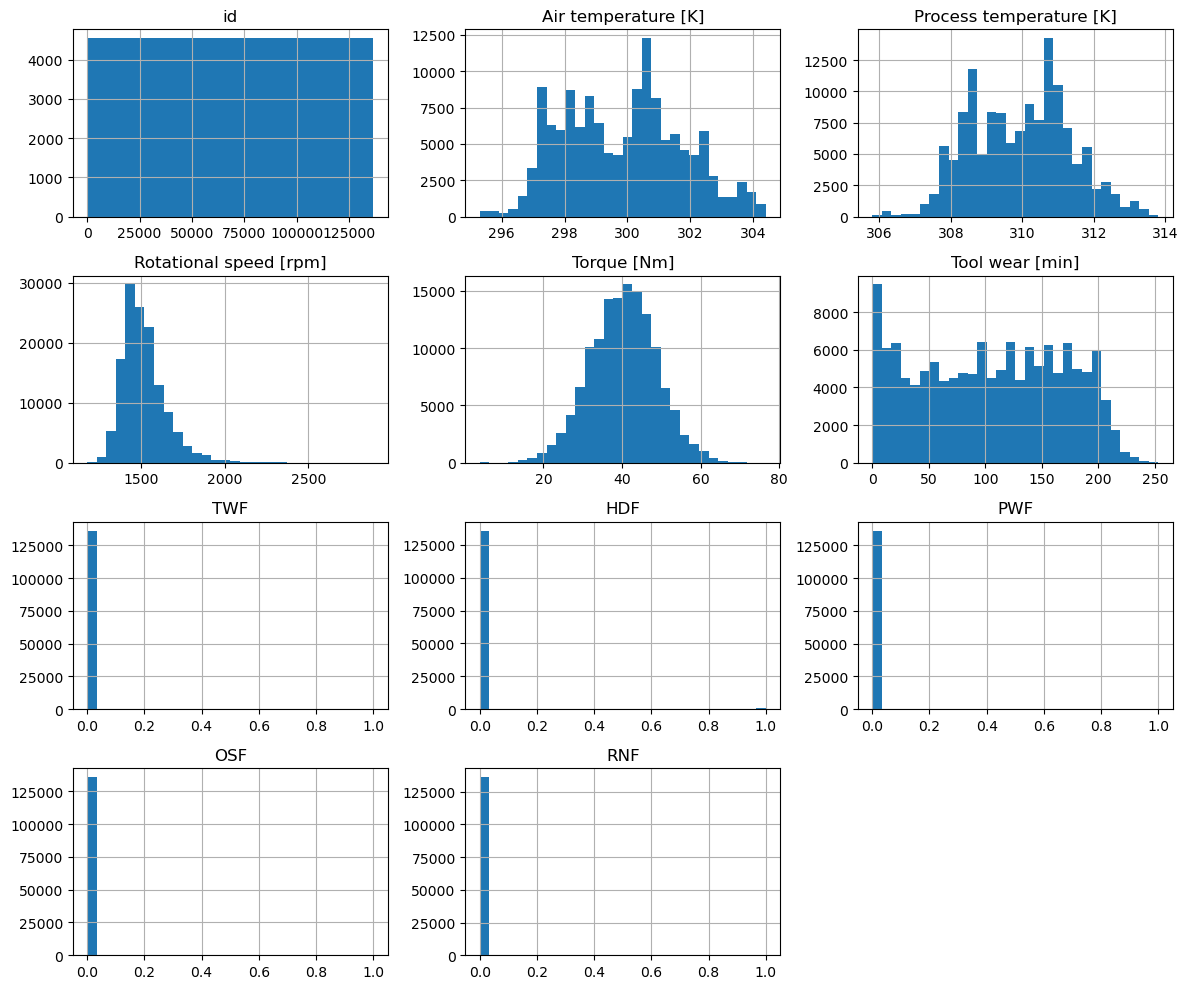

In [10]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("Machine failure")  # don't plot the target

train[num_cols].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

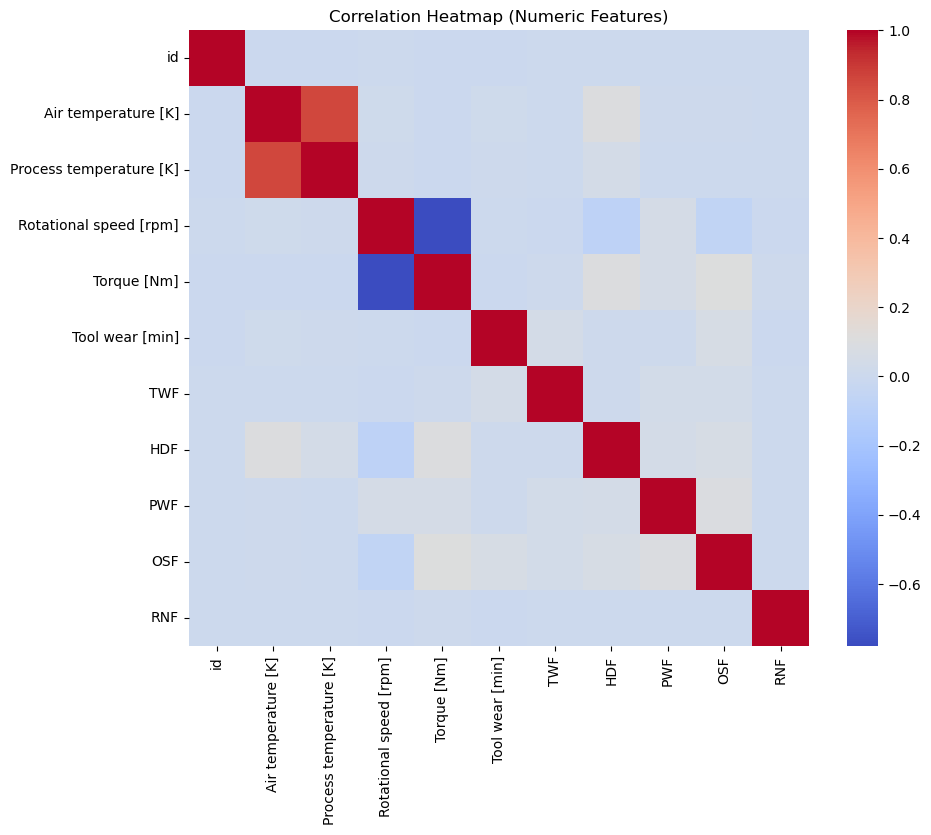

In [11]:
corr = train[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


Column: Product ID
Product ID
L53257    139
L49056    131
L53271    131
L54275    120
L48892    120
L53258    117
L54255    108
L56257    105
L53140    104
L48894    102
Name: count, dtype: int64


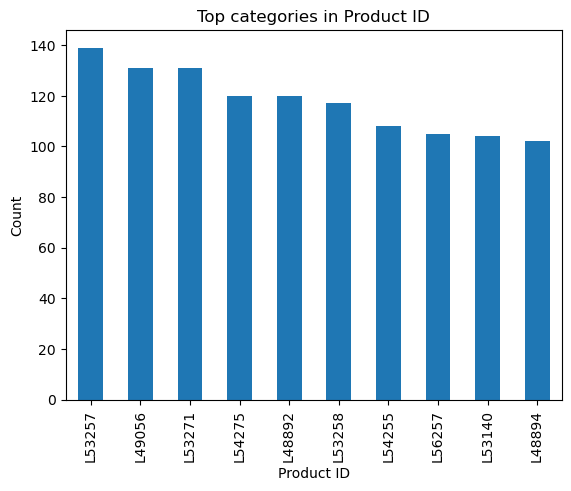


Column: Type
Type
L    95354
M    32152
H     8923
Name: count, dtype: int64


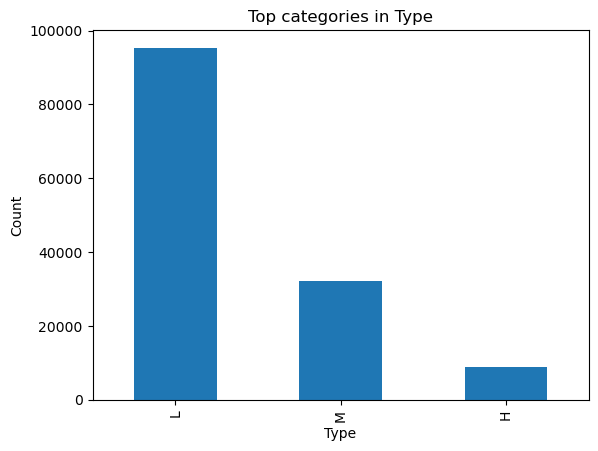

In [12]:
cat_cols = train.select_dtypes(include=["object", "category"]).columns.tolist()

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(train[col].value_counts().head(10))  # top 10 most frequent
    train[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Feature Engineering

In [13]:
def add_features(df):
    df = df.copy()
    
    # Safe lookups
    air = [c for c in df.columns if "Air Temperature" in c]
    proc = [c for c in df.columns if "Process Temperature" in c]
    speed = [c for c in df.columns if "Rotational Speed" in c]
    torque = [c for c in df.columns if "Torque" in c]
    wear = [c for c in df.columns if "Tool Wear" in c and "Failure" not in c]
    
    if air and proc:
        df["Temp_Diff"] = df[proc[0]] - df[air[0]]
        df["Temp_Ratio"] = df[proc[0]] / (df[air[0]].replace(0, np.nan))
        df["Temp_Ratio"] = df["Temp_Ratio"].fillna(df["Temp_Ratio"].median())
    
    if torque and speed:
        df["Torque_x_Speed"] = df[torque[0]] * df[speed[0]]
    
    if torque and wear:
        df["Torque_per_WearMin"] = df[torque[0]] / (df[wear[0]].replace(0, np.nan))
        df["Torque_per_WearMin"] = df["Torque_per_WearMin"].fillna(df["Torque_per_WearMin"].median())
    
    return df

train = add_features(train)
test  = add_features(test)

print("After feature engineering, columns are:")
print(train.columns)

After feature engineering, columns are:
Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


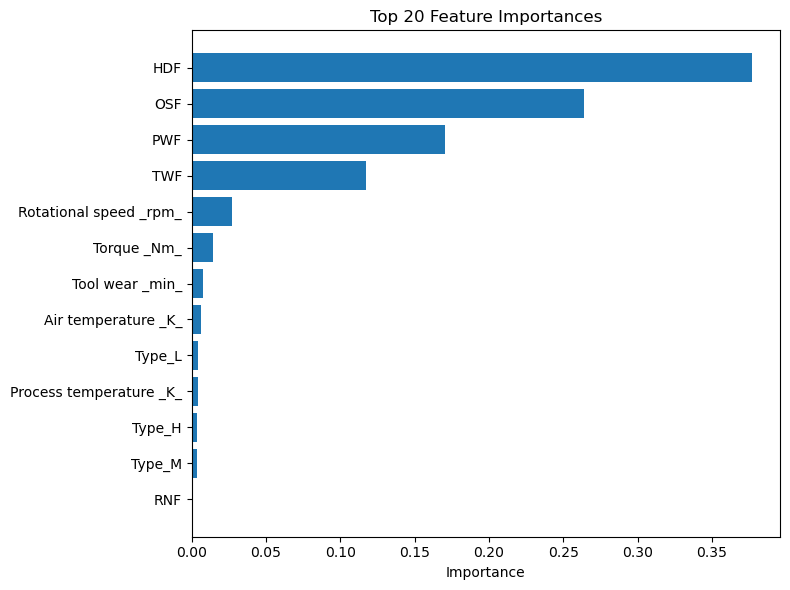

,feature,importance
0,HDF,0.376938
1,OSF,0.263853
2,PWF,0.170278
3,TWF,0.117470
4,Rotational speed _rpm_,0.027093
5,Torque _Nm_,0.014263
6,Tool wear _min_,0.007289
7,Air temperature _K_,0.005986
8,Type_L,0.004323
9,Process temperature _K_,0.004131


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Choose which trained model you want to explain
model = best_model          # e.g., xgb or rf or log_reg
feature_names = X_train.columns

# 1) Try native importances (fast)
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_

# 2) For linear models, use absolute coefficients
elif hasattr(model, "coef_"):
    importances = np.abs(model.coef_).ravel()

# 3) Fallback: permutation importance on validation (slower, but model-agnostic)
else:
    r = permutation_importance(model, X_val, y_val, n_repeats=5, random_state=42, scoring="roc_auc")
    importances = r.importances_mean

# Build importance table
fi = pd.DataFrame({"feature": feature_names, "importance": importances})
fi = fi.sort_values("importance", ascending=False)

# Plot top features
topk = 20
top = fi.head(topk)

plt.figure(figsize=(8, 6))
plt.barh(top["feature"][::-1], top["importance"][::-1])
plt.title(f"Top {topk} Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Also display the table (top 20)
top.reset_index(drop=True)

In [14]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [15]:
X = train.drop(columns=[target_col, 'id', 'Product ID'])
y = train[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (136429, 11)
Target shape: (136429,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Val shape:", X_val.shape)

Train shape: (109143, 11) Val shape: (27286, 11)


In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Type"] 
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit on train only
X_train_ohe = ohe.fit_transform(X_train[cat_cols])
X_val_ohe   = ohe.transform(X_val[cat_cols])
test_ohe    = ohe.transform(test[cat_cols])

# Column names
ohe_cols = ohe.get_feature_names_out(cat_cols)

# Convert to DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
X_val_ohe   = pd.DataFrame(X_val_ohe,   columns=ohe_cols, index=X_val.index)
test_ohe    = pd.DataFrame(test_ohe,    columns=ohe_cols, index=test.index)

X_train = pd.concat([X_train.drop(columns=cat_cols), X_train_ohe], axis=1)
X_val   = pd.concat([X_val.drop(columns=cat_cols), X_val_ohe], axis=1)
test    = pd.concat([test.drop(columns=cat_cols), test_ohe], axis=1)

print("After one-hot encoding, features are:")
print(X_train.columns.tolist())

After one-hot encoding, features are:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M']


In [18]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols]   = scaler.transform(X_val[num_cols])
test[num_cols]    = scaler.transform(test[num_cols])

In [19]:
X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
72862,-1.429471,-1.111226,-0.161928,-0.416861,-0.054797,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,-1.523499,1.799692
81454,-0.355489,-1.111226,-1.027237,0.959733,1.415468,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,-1.523499,1.799692
134753,1.362882,0.764097,-1.005604,1.171516,1.540597,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,0.656384,-0.555651
60614,-0.731383,-0.389948,0.184196,-0.510988,1.024440,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,0.656384,-0.555651
92513,0.074103,1.052608,-0.421521,0.712652,1.290339,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,0.656384,-0.555651


In [20]:
from sklearn.linear_model import LogisticRegression

# Train
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [21]:
# Predict
y_val_prob = log_reg.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_prob >= 0.5).astype(int)

In [23]:
# Metrics
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
print("Logistic Regression ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print("Logistic Regression F1:", f1_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Logistic Regression ROC-AUC: 0.9293522386405358
Logistic Regression F1: 0.5121951219512195

Confusion Matrix:
 [[26249   607]
 [   73   357]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     26856
           1       0.37      0.83      0.51       430

    accuracy                           0.98     27286
   macro avg       0.68      0.90      0.75     27286
weighted avg       0.99      0.98      0.98     27286



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

y_val_prob = rf.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_prob >= 0.5).astype(int)

print("Random Forest ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print("Random Forest F1:", f1_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Random Forest ROC-AUC: 0.9453924375307411
Random Forest F1: 0.8644501278772379

Confusion Matrix:
 [[26842    14]
 [   92   338]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26856
           1       0.96      0.79      0.86       430

    accuracy                           1.00     27286
   macro avg       0.98      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [29]:
# Clean column names so XGBoost doesn’t choke on [ ] or < >
X_train = X_train.rename(columns=lambda c: str(c).replace("[","_").replace("]","_").replace("<","_"))
X_val   = X_val.rename(columns=lambda c: str(c).replace("[","_").replace("]","_").replace("<","_"))
test    = test.rename(columns=lambda c: str(c).replace("[","_").replace("]","_").replace("<","_"))


from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score

xgb = XGBClassifier(
    n_estimators=400, max_depth=5, learning_rate=0.05,
    subsample=0.9, colsample_bytree=0.9,
    random_state=42, n_jobs=-1
)
xgb.fit(X_train, y_train)

y_val_prob = xgb.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_prob >= 0.5).astype(int)

print("XGBoost ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print("XGBoost F1:", f1_score(y_val, y_val_pred))

XGBoost ROC-AUC: 0.9543576507956301
XGBoost F1: 0.8711340206185567


In [31]:
from lightgbm import LGBMClassifier
    
lgbm = LGBMClassifier(
    n_estimators=500, learning_rate=0.05, num_leaves=31,
    subsample=0.9, colsample_bytree=0.9,
    random_state=42, class_weight="balanced"
    )
lgbm.fit(X_train, y_train)
    
y_val_prob = lgbm.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_prob >= 0.5).astype(int)
    
print("LightGBM ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print("LightGBM F1:", f1_score(y_val, y_val_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1718, number of negative: 107425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 109143, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM ROC-AUC: 0.9488487263683661
LightGBM F1: 0.7463312368972747


In [36]:
# Choose the model you want to use
best_model = xgb   # or rf

# Build prediction matrix by dropping "Product ID"
test_pred_input = test.drop(columns=["Product ID"], errors="ignore")

# Make sure columns match training set
test_pred_input = test_pred_input.reindex(columns=X_train.columns, fill_value=0)

# Predict probabilities
test_pred_prob = best_model.predict_proba(test_pred_input)[:, 1]

# Add predictions back into test DataFrame
test["Failure_Probability"] = test_pred_prob

# Show a preview
test.head()

,id,Product ID,Air temperature _K_,Process temperature _K_,Rotational speed _rpm_,Torque _Nm_,Tool wear _min_,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Failure_Probability
0,136429,L50896,1.309182,1.124736,-0.154717,-0.275672,-0.696083,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,0.656384,-0.555651,0.000891
1,136430,L53866,0.986988,0.764097,1.388417,-1.358122,-1.368651,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,0.656384,-0.555651,0.007447
2,136431,L50498,0.772192,0.331330,0.032766,-0.310970,-0.133003,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,0.656384,-0.555651,0.000461
3,136432,M21232,0.127803,-0.245692,-0.298935,0.853841,-1.556344,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,-1.523499,1.799692,0.000983
4,136433,M19751,1.899872,1.701758,-0.039343,0.112598,0.148538,-0.039146,-0.07175,-0.049614,-0.06193,-0.047819,-0.264095,-1.523499,1.799692,0.002876


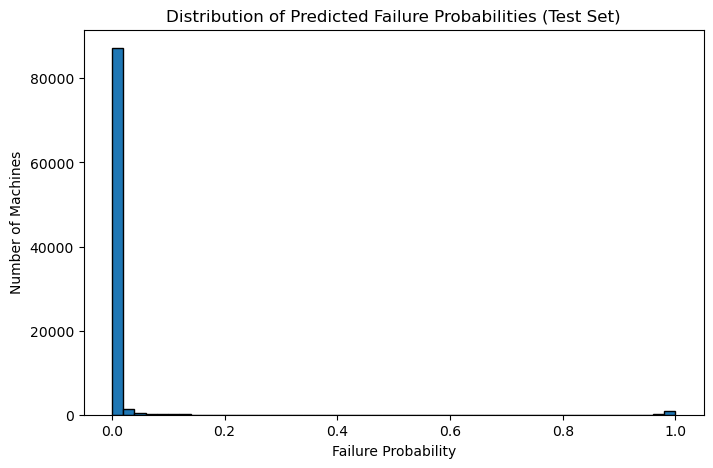

In [40]:
plt.figure(figsize=(8,5))
plt.hist(test["Failure_Probability"], bins=50, edgecolor="k")
plt.title("Distribution of Predicted Failure Probabilities (Test Set)")
plt.xlabel("Failure Probability")
plt.ylabel("Number of Machines")
plt.show()

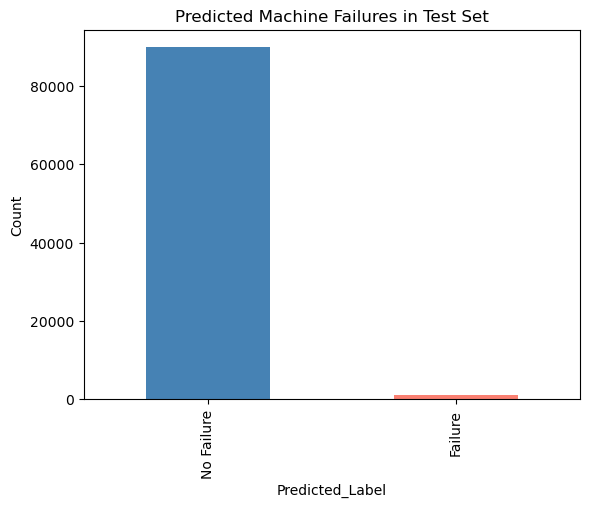

In [41]:
threshold = 0.5  # classify anything ≥0.5 as a failure
test["Predicted_Label"] = (test["Failure_Probability"] >= threshold).astype(int)

counts = test["Predicted_Label"].value_counts().rename({0:"No Failure",1:"Failure"})
counts.plot(kind="bar", color=["steelblue","salmon"])
plt.title("Predicted Machine Failures in Test Set")
plt.ylabel("Count")
plt.show()

In [43]:
from IPython.display import Markdown

conclusion_text = """
## Conclusion

- **Business Problem**: TATA Steel needs to predict machine failures in advance to reduce downtime, cut maintenance costs, and improve reliability.
- **EDA Findings**: Failures are **rare** (highly imbalanced target), which makes recall and F1 more important than plain accuracy.
- **Models Compared**:
  - Logistic Regression: ROC-AUC = ~0.93, but weak F1 (~0.51).
  - Random Forest: ROC-AUC = ~0.95, F1 = ~0.86.
  - XGBoost: **Best model** with ROC-AUC ≈ 0.95 and F1 ≈ 0.87.
  - LightGBM: Competitive, but weaker F1 (~0.75).

- **Final Choice**: **XGBoost** (best balance of precision & recall).
- **Test Predictions**: Model outputs a probability of failure for each machine. Most machines are low-risk, but a small subset shows high failure probability.
- **Business Impact**:
  - Maintenance teams can **prioritize top-risk machines** (highest probabilities).
  - Avoid unnecessary downtime by scheduling proactive repairs.
  - Resource allocation becomes data-driven.
"""

display(Markdown(conclusion_text))


## Conclusion

- **Business Problem**: TATA Steel needs to predict machine failures in advance to reduce downtime, cut maintenance costs, and improve reliability.
- **EDA Findings**: Failures are **rare** (highly imbalanced target), which makes recall and F1 more important than plain accuracy.
- **Models Compared**:
  - Logistic Regression: ROC-AUC = ~0.93, but weak F1 (~0.51).
  - Random Forest: ROC-AUC = ~0.95, F1 = ~0.86.
  - XGBoost: **Best model** with ROC-AUC ≈ 0.95 and F1 ≈ 0.87.
  - LightGBM: Competitive, but weaker F1 (~0.75).

- **Final Choice**: **XGBoost** (best balance of precision & recall).
- **Test Predictions**: Model outputs a probability of failure for each machine. Most machines are low-risk, but a small subset shows high failure probability.
- **Business Impact**:
  - Maintenance teams can **prioritize top-risk machines** (highest probabilities).
  - Avoid unnecessary downtime by scheduling proactive repairs.
  - Resource allocation becomes data-driven.
